<a href="https://colab.research.google.com/github/kikecastillocolombia/desafio_telecom_2/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [ ]:
import pandas as pd
import requests

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)

df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [ ]:
# Mostrar resumen general con info()
df.info()

# Mostrar los tipos de datos de cada columna
print("\nTipos de datos por columna:")
print(df.dtypes)

# Mostrar las primeras 5 filas para ver algunos datos
print("\nPrimeras 5 filas del DataFrame:")
print(df.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB

Tipos de datos por columna:
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

Primeras 5 filas del DataFrame:
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'M

In [ ]:
counts = df['Churn'].value_counts(dropna=False)
percentages = df['Churn'].value_counts(normalize=True, dropna=False) * 100
pd.DataFrame({'counts': counts, 'percentages': percentages})


,counts,percentages
Churn,,
No,5174,71.198569
Yes,1869,25.719004
,224,3.082427


In [ ]:
df.loc[~df['Churn'].isin(['Yes', 'No']), 'Churn'].unique()


array([''], dtype=object)

### Comprobación de incoherencias en los datos

In [ ]:
#1. Revisar valores nulos por columna
print('Valores nulos por columna:')
print(df.isnull().sum())

#2. Revisar valores vacios('') por columna
print('\nValores vacios('') por columna:')
print((df == '').sum())

# 3. Revisar valores duplicados segun customerID
print("\nNúmero de filas duplicadas según customerID:")
print(df.duplicated(subset=['customerID']).sum())


# 4.Revisar valores únicos en columnas categóricas clave
print('\nValores únicos es "Churn":')
print(df['Churn'].unique())



Valores nulos por columna:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64

Valores vacios() por columna:
customerID      0
Churn         224
customer        0
phone           0
internet        0
account         0
dtype: int64

Número de filas duplicadas según customerID:
0

Valores únicos es "Churn":
['No' 'Yes' '']


In [ ]:
import ast

# Función auxiliar para convertir string a dict
def convertir_a_dict(columna):
    return columna.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Convertir strings a diccionarios reales
df['customer'] = convertir_a_dict(df['customer'])
df['phone'] = convertir_a_dict(df['phone'])
df['internet'] = convertir_a_dict(df['internet'])
df['account'] = convertir_a_dict(df['account'])

# Expandir cada columna en múltiples columnas
df_customer = pd.json_normalize(df['customer']).add_prefix('customer_')
df_phone = pd.json_normalize(df['phone']).add_prefix('phone_')
df_internet = pd.json_normalize(df['internet']).add_prefix('internet_')
df_account = pd.json_normalize(df['account']).add_prefix('account_')

# Concatenar columnas expandidas con df original
df = pd.concat([df.drop(['customer', 'phone', 'internet', 'account'], axis=1),
                df_customer, df_phone, df_internet, df_account], axis=1)

# Confirmar estructura final
print("Nuevas columnas del DataFrame:\n")
print(df.columns)


Nuevas columnas del DataFrame:

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges.Monthly', 'account_Charges.Total'],
      dtype='object')


In [ ]:
# 1. Valores nulos
print("Valores nulos por columna:\n")
print(df.isnull().sum())

# 2. Valores vacíos como texto ''
print("\nValores vacíos ('') por columna:\n")
print((df == '').sum())

# 3. Tipos de datos por columna
print("\nTipos de datos por columna:\n")
print(df.dtypes)

# 4. Duplicados (ahora sí debe funcionar)
print("\nNúmero de filas duplicadas:\n")
print(df.duplicated().sum())


Valores nulos por columna:

customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges.Monthly      0
account_Charges.Total        0
dtype: int64

Valores vacíos ('') por columna:

customerID                     0
Churn                        224
customer_gender                0
customer_SeniorCitizen         0
customer_Partner               0
customer_Dependents            0
customer_tenure                0
phone_PhoneService             0
phone_Mul

In [ ]:
# 1. Reemplazar valores vacíos en 'Churn' por 'desconocido'
df['Churn'] = df['Churn'].replace('', 'desconocido')

# 2. Pasar todos los valores de texto a minúsculas y quitar espacios
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.lower().str.strip()

# 3. Eliminar filas duplicadas
df = df.drop_duplicates()

# 4. Verificar que se aplicaron los cambios
print("Valores únicos en 'Churn':", df['Churn'].unique())
print("\nNúmero de filas después de limpieza:", df.shape[0])


Valores únicos en 'Churn': ['no' 'yes' 'desconocido']

Número de filas después de limpieza: 7267


In [ ]:
print(df.columns)


Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges.Monthly', 'account_Charges.Total'],
      dtype='object')


In [ ]:
# Convertir la columna de facturación mensual a float y calcular el valor diario
df['Cuentas_Diarias'] = df['account_Charges.Monthly'].astype(float) / 30


In [ ]:
df[['account_Charges.Monthly', 'Cuentas_Diarias']].head()


,account_Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [ ]:
# Convertir todos los 'Yes' y 'No' a 1 y 0
yes_no_map = {'Yes': 1, 'No': 0}

# Identificar columnas con 'Yes'/'No' para aplicar la conversión
binary_columns = [col for col in df.columns if df[col].isin(['Yes', 'No']).any()]

# Aplicar el mapeo
df[binary_columns] = df[binary_columns].replace(yes_no_map)

# Confirmar los cambios
print("✔️ Columnas transformadas a valores binarios:")
print(binary_columns)
df[binary_columns].head()


✔️ Columnas transformadas a valores binarios:
[]


""
0
1
2
3
4


In [ ]:
# 1. Seleccionar columnas numéricas relevantes
columnas_numericas = ['customer_tenure', 'account_Charges.Monthly', 'account_Charges.Total', 'Cuentas_Diarias']

# Forzamos a numérico (los valores no convertibles quedan como NaN)
cols_to_numeric = [
    'account_Charges.Total',
    'account_Charges.Monthly',
    'customer_tenure',
    'Cuentas_Diarias'
]

for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Re-ejecutamos describe y mediana
numeric_stats = df[cols_to_numeric].describe()
medianas = df[cols_to_numeric].median()

print("📊 Estadísticas Generales (actualizadas):")
display(numeric_stats)

print("\n🔹 Medianas (actualizadas):")
print(medianas)

print("\n📊 Estadísticas por Churn (0 = no se fue, 1 = sí se fue):")
display(df.groupby('Churn')[cols_to_numeric].describe())


📊 Estadísticas Generales (actualizadas):


,account_Charges.Total,account_Charges.Monthly,customer_tenure,Cuentas_Diarias
count,7256.000000,7267.000000,7267.000000,7267.000000
mean,2280.634213,64.720098,32.346498,2.157337
std,2268.632997,30.129572,24.571773,1.004319
min,18.800000,18.250000,0.000000,0.608333
25%,400.225000,35.425000,9.000000,1.180833
50%,1391.000000,70.300000,29.000000,2.343333
75%,3785.300000,89.875000,55.000000,2.995833
max,8684.800000,118.750000,72.000000,3.958333



🔹 Medianas (actualizadas):
account_Charges.Total      1391.000000
account_Charges.Monthly      70.300000
customer_tenure              29.000000
Cuentas_Diarias               2.343333
dtype: float64

📊 Estadísticas por Churn (0 = no se fue, 1 = sí se fue):


account_Charges.Total                                             \
                            count         mean          std    min       25%   
Churn                                                                          
desconocido                 224.0  2196.933705  2329.961954  18.90  351.0375   
no                         5163.0  2555.344141  2329.456984  18.80  577.8250   
yes                        1869.0  1531.796094  1890.822994  18.85  134.5000   

                                          account_Charges.Monthly             \
                  50%        75%      max                   count       mean   
Churn                                                                          
desconocido  1163.175  3562.8625  8425.30                   224.0  63.412277   
no           1683.600  4264.1250  8672.45                  5174.0  61.265124   
yes           703.550  2331.3000  8684.80                  1869.0  74.441332   

             ... customer_tenure       Cuentas_Diarias                      \
             ...             75%   max           count      mean       std   
Churn        ...                                                             
desconocido  ...            56.0  72.0           224.0  2.113743  1.046290   
no           ...            61.0  72.0          5174.0  2.042171  1.036422   
yes          ...            29.0  72.0          1869.0  2.481378  0.822202   

                                                               
                  min       25%       50%       75%       max  
Churn                                                          
desconocido  0.625000  0.947500  2.303333  3.013750  3.851667  
no           0.608333  0.836667  2.147500  2.946667  3.958333  
yes          0.628333  1.871667  2.655000  3.140000  3.945000  

[3 rows x 32 columns]

In [ ]:
# Verificar datos en Churn
print("Valores únicos en Churn:", df['Churn'].unique())
print("Cantidad de valores nulos en Churn:", df['Churn'].isnull().sum())
print("Conteo de valores en Churn (incluyendo nulos):")
print(df['Churn'].value_counts(dropna=False))


Valores únicos en Churn: ['no' 'yes' 'desconocido']
Cantidad de valores nulos en Churn: 0
Conteo de valores en Churn (incluyendo nulos):
Churn
no             5174
yes            1869
desconocido     224
Name: count, dtype: int64


#📊 Carga y análisis

Valores únicos en Churn después de eliminar 'desconocido': ['no' 'yes']
Cantidad de valores nulos en Churn: 0


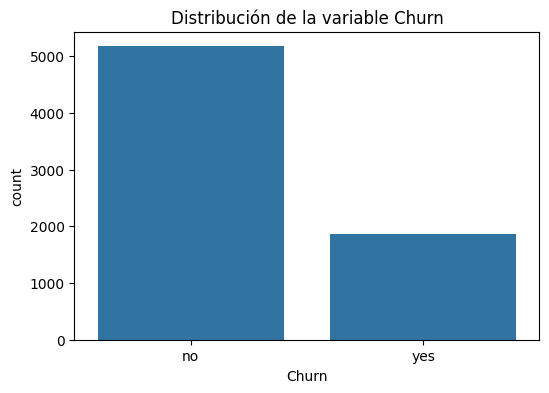

  Churn  Churn_bin
0    no          0
1    no          0
2   yes          1
3   yes          1
4   yes          1


In [ ]:
# Paso 1: Eliminar filas con 'desconocido' en Churn
df = df[df['Churn'] != 'desconocido'].copy()

# Paso 2: Verificar valores únicos y nulos restantes
print("Valores únicos en Churn después de eliminar 'desconocido':", df['Churn'].unique())
print("Cantidad de valores nulos en Churn:", df['Churn'].isnull().sum())

# Paso 3: Visualizar distribución con un gráfico de barras
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Distribución de la variable Churn')
plt.show()

# Paso 4: Convertir Churn a binario
df['Churn_bin'] = df['Churn'].map({'no': 0, 'yes': 1})

print(df[['Churn', 'Churn_bin']].head())


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual
sns.set(style="whitegrid")


In [ ]:
def plot_churn_by_category(df, column_name):
    churn_rates = df.groupby(column_name)['Churn_bin'].mean().sort_values()

    plt.figure(figsize=(8, 4))
    ax = sns.barplot(x=churn_rates.index, y=churn_rates.values, palette="viridis")
    plt.title(f'Tasa de Churn por {column_name}', fontsize=14)
    plt.ylabel('Tasa de Churn')
    plt.xlabel(column_name)
    plt.xticks(rotation=30)
    plt.ylim(0, 1)

    for i, rate in enumerate(churn_rates.values):
        ax.text(i, rate + 0.02, f"{rate:.2f}", ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


<ipython-input-18-d07721db0ba4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rates.index, y=churn_rates.values, palette="viridis")


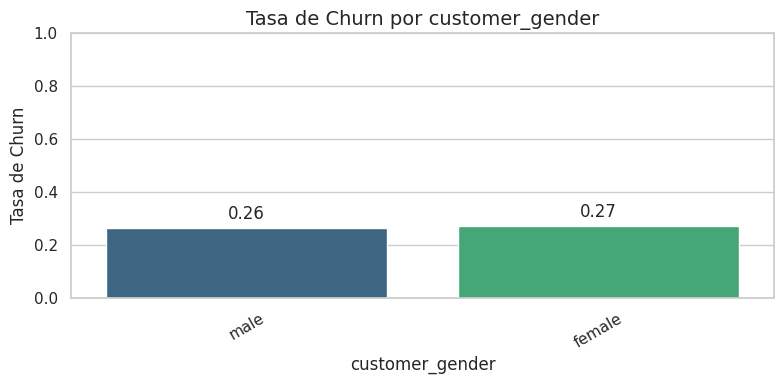

<ipython-input-18-d07721db0ba4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rates.index, y=churn_rates.values, palette="viridis")


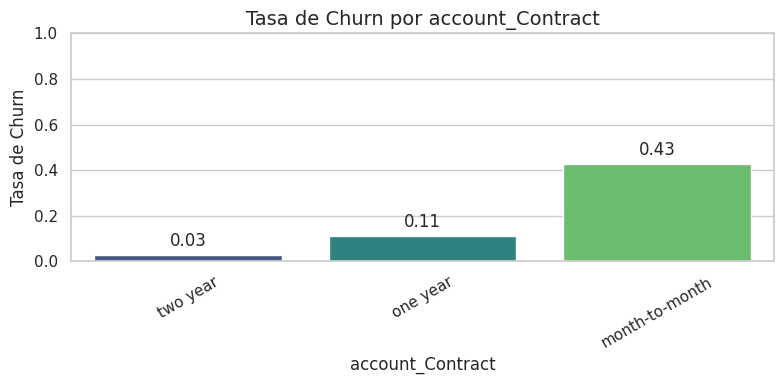

<ipython-input-18-d07721db0ba4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rates.index, y=churn_rates.values, palette="viridis")


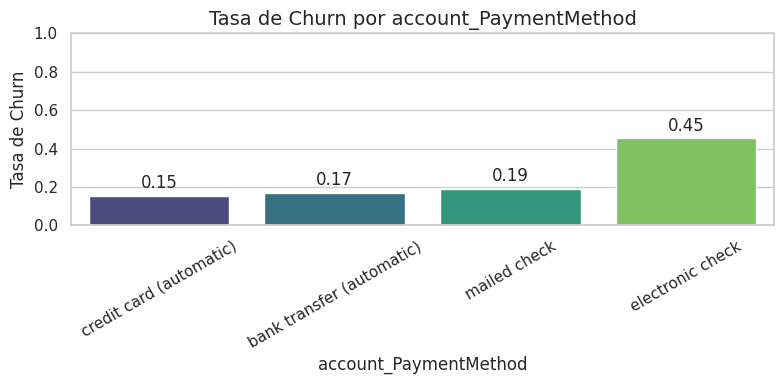

In [ ]:
plot_churn_by_category(df, 'customer_gender')
plot_churn_by_category(df, 'account_Contract')
plot_churn_by_category(df, 'account_PaymentMethod')


<ipython-input-18-d07721db0ba4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rates.index, y=churn_rates.values, palette="viridis")


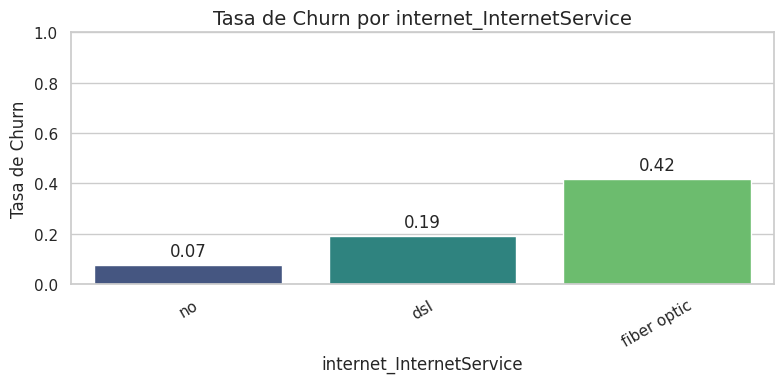

<ipython-input-18-d07721db0ba4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rates.index, y=churn_rates.values, palette="viridis")


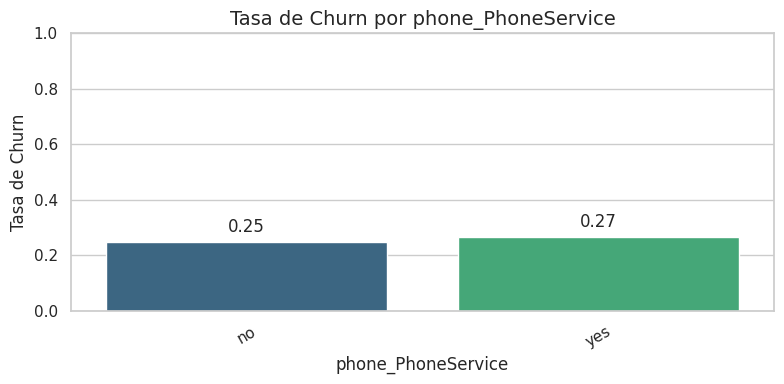

<ipython-input-18-d07721db0ba4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rates.index, y=churn_rates.values, palette="viridis")


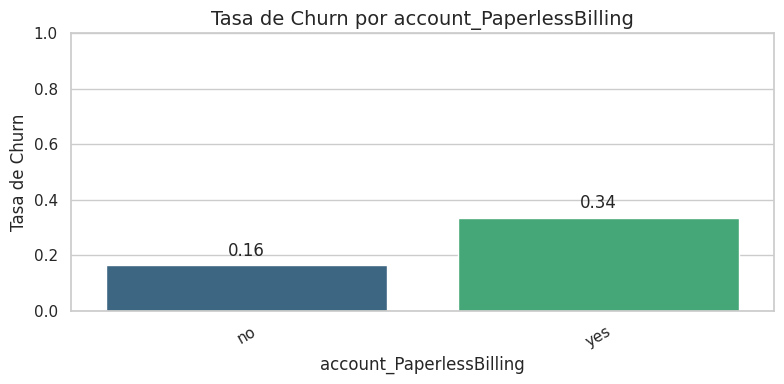

<ipython-input-18-d07721db0ba4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rates.index, y=churn_rates.values, palette="viridis")


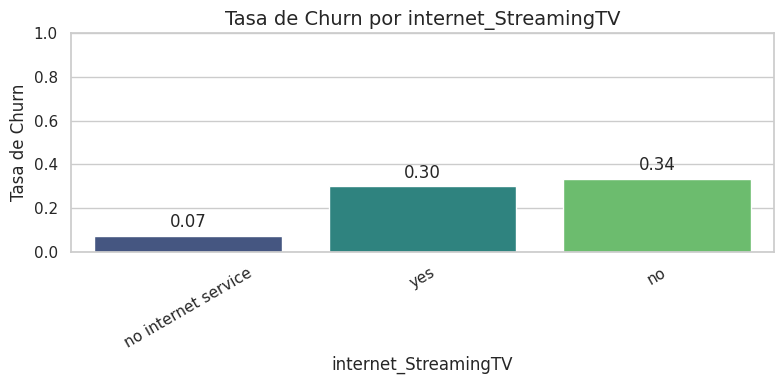

<ipython-input-18-d07721db0ba4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rates.index, y=churn_rates.values, palette="viridis")


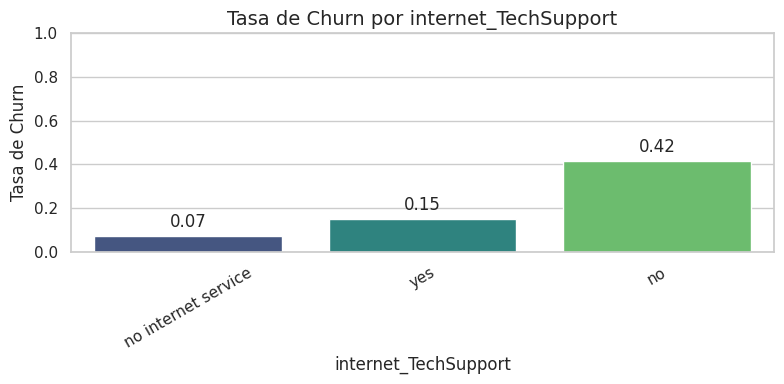

In [ ]:
plot_churn_by_category(df, 'internet_InternetService')
plot_churn_by_category(df, 'phone_PhoneService')
plot_churn_by_category(df, 'account_PaperlessBilling')
plot_churn_by_category(df, 'internet_StreamingTV')
plot_churn_by_category(df, 'internet_TechSupport')


<ipython-input-21-0ac7477de66c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-21-0ac7477de66c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-21-0ac7477de66c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-21-0ac7477de66c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


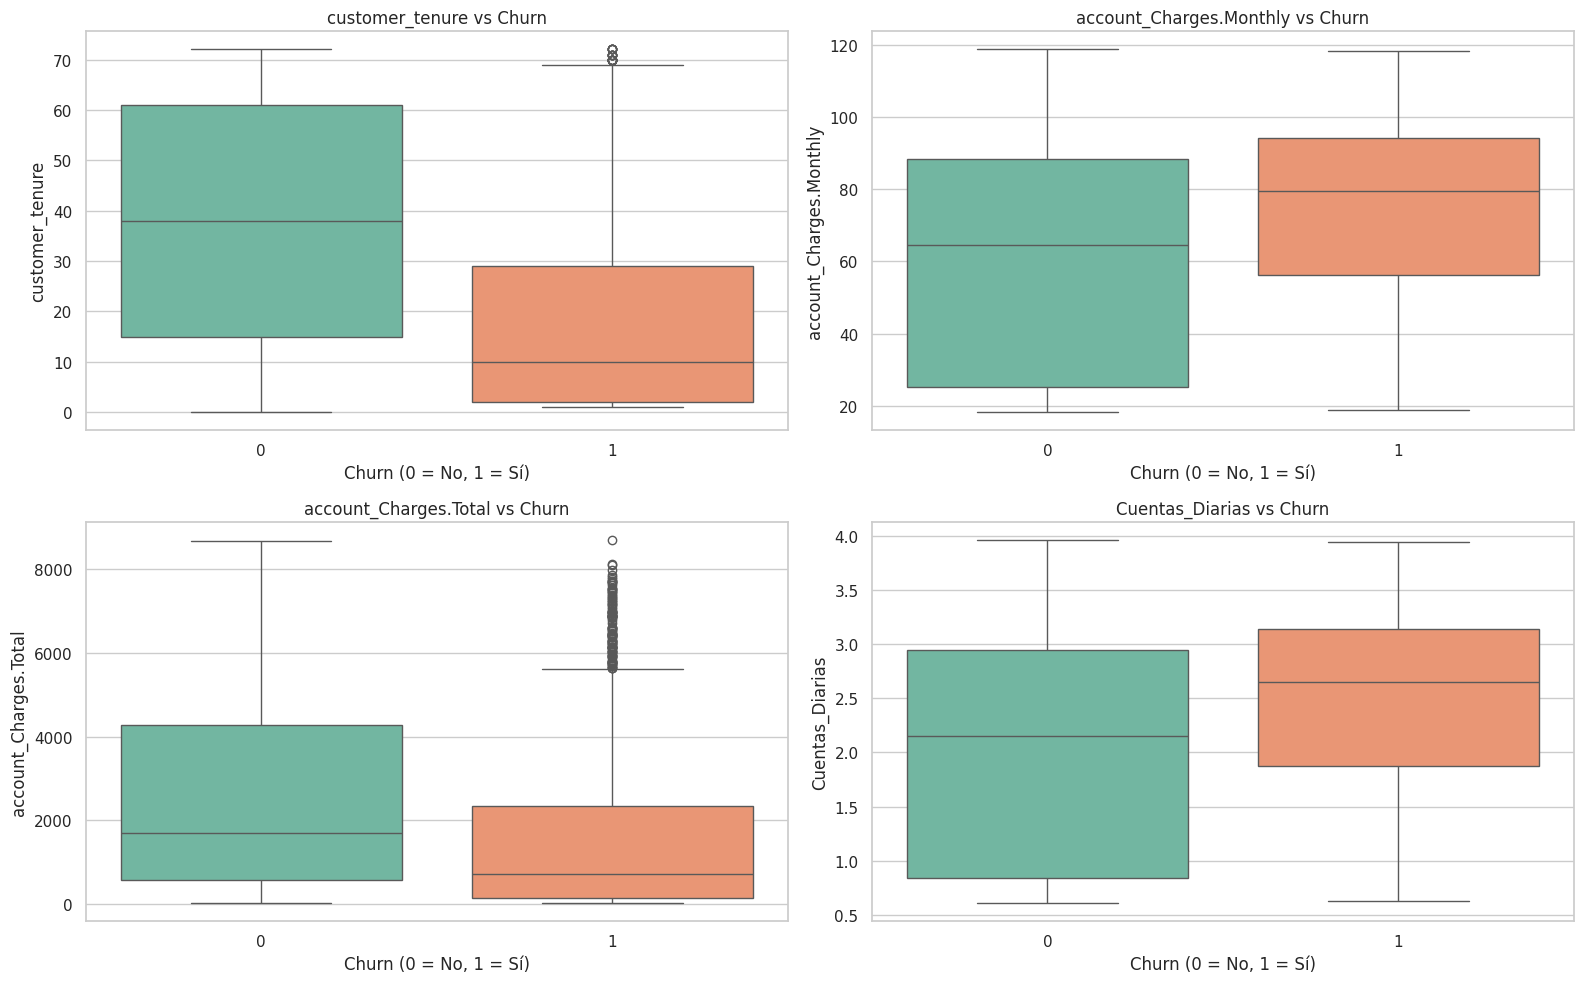

In [ ]:
# Estilo de gráficos
sns.set(style="whitegrid")

# Lista de variables numéricas a explorar
variables_numericas = [
    "customer_tenure",
    "account_Charges.Monthly",
    "account_Charges.Total",
    "Cuentas_Diarias"
]

# Gráficos en varias filas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

# Iterar sobre las variables y graficarlas
for var, ax in zip(variables_numericas, axes.flatten()):
    sns.boxplot(
        data=df,
        x="Churn_bin",
        y=var,
        ax=ax,
        palette=["#66c2a5", "#fc8d62"]
    )
    ax.set_title(f"{var} vs Churn")
    ax.set_xlabel("Churn (0 = No, 1 = Sí)")
    ax.set_ylabel(var)

plt.tight_layout()
plt.show()

#📄Informe final

# Informe de Análisis de Evasión de Clientes (Churn)

---

## 1. Introducción

El objetivo de este análisis es entender el fenómeno de evasión de clientes (churn) en nuestra base de datos. La evasión representa la pérdida de clientes que deciden cancelar el servicio, lo que afecta directamente los ingresos y la sostenibilidad del negocio. Mediante este análisis exploratorio buscamos identificar patrones y características asociadas a la evasión para facilitar estrategias que reduzcan este problema.

---

## 2. Limpieza y Tratamiento de Datos

Se importaron los datos y se detectaron inconsistencias como valores nulos y duplicados. Se reemplazaron valores desconocidos en la variable `Churn` y se eliminaron filas con estos valores. También se estandarizaron columnas y se crearon variables derivadas como `Cuentas_Diarias` para mejorar el análisis.

Además, se transformaron variables categóricas a formato binario cuando fue necesario para facilitar la interpretación.

---

## 3. Análisis Exploratorio de Datos

### 3.1 Distribución General de Evasión (Churn)



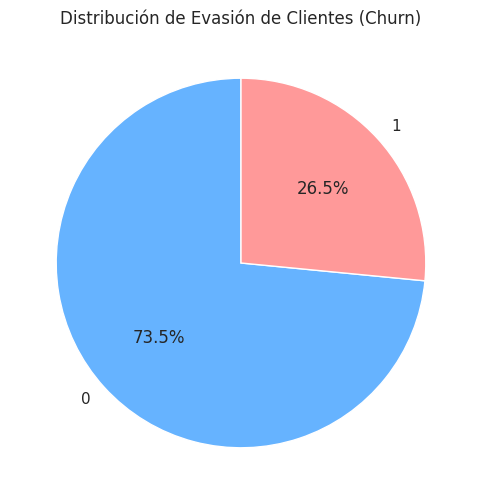

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
churn_counts = df['Churn'].value_counts()
plt.pie(
    churn_counts.values,
    labels=churn_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff','#ff9999']
)
plt.title('Distribución de Evasión de Clientes (Churn)')
plt.show()

###3.2 Análisis por Variables Categóricas
Género vs Churn

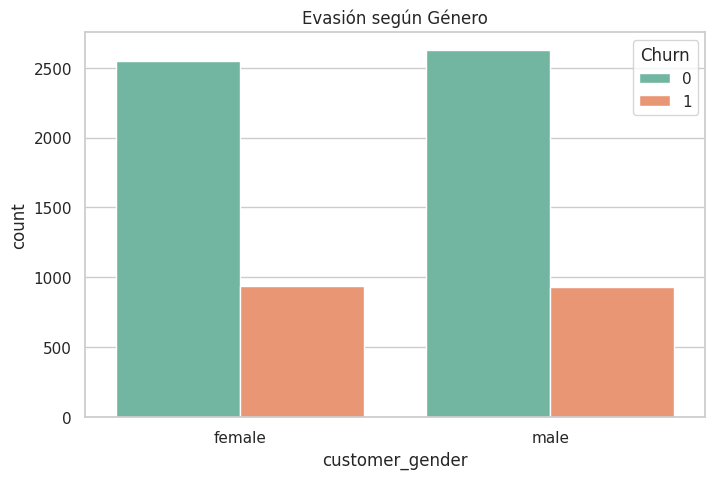

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='customer_gender', hue='Churn', palette='Set2')
plt.title('Evasión según Género')
plt.show()


###Tipo de Contrato vs Churn


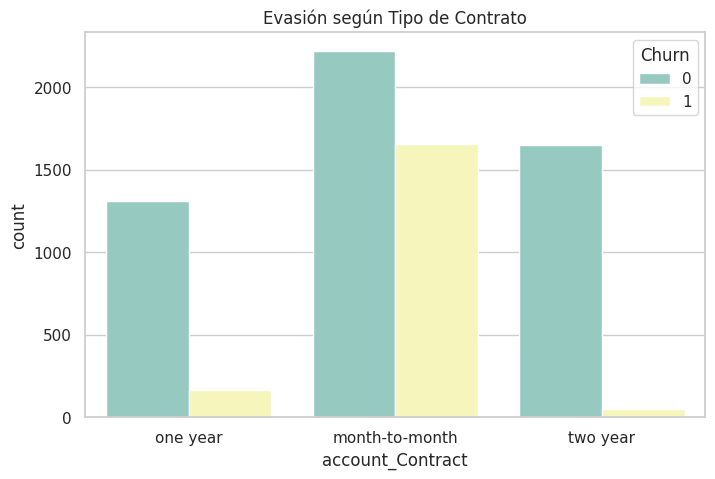

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='account_Contract', hue='Churn', palette='Set3')
plt.title('Evasión según Tipo de Contrato')
plt.show()


###Método de Pago vs Churn

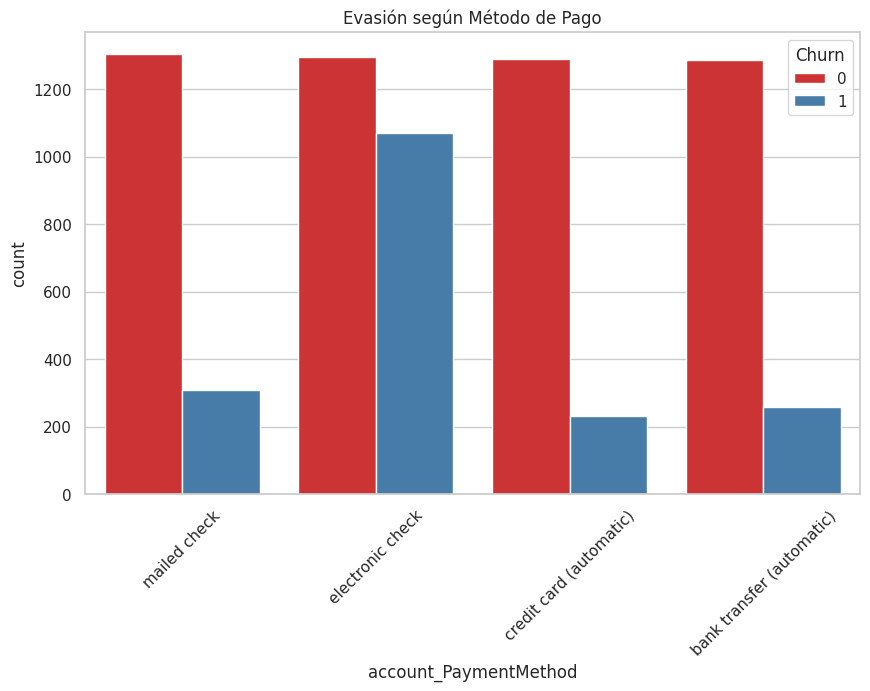

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='account_PaymentMethod', hue='Churn', palette='Set1')
plt.title('Evasión según Método de Pago')
plt.xticks(rotation=45)
plt.show()


###3.3 Variables Numéricas y Evasión


<ipython-input-31-f39f214d36a4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=var, data=df, palette='pastel')


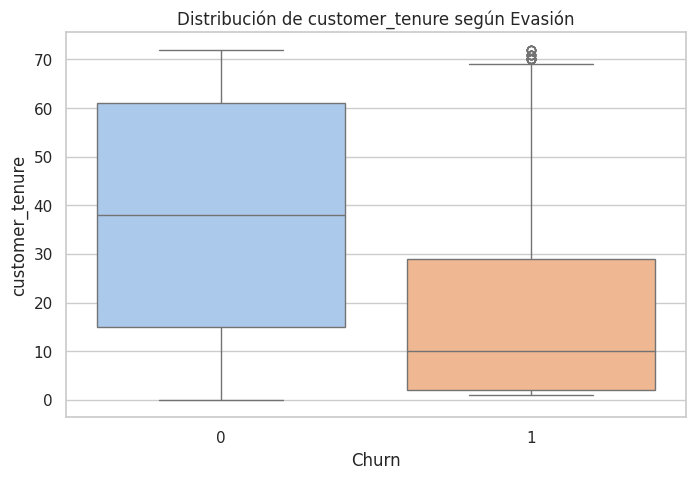

<ipython-input-31-f39f214d36a4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=var, data=df, palette='pastel')


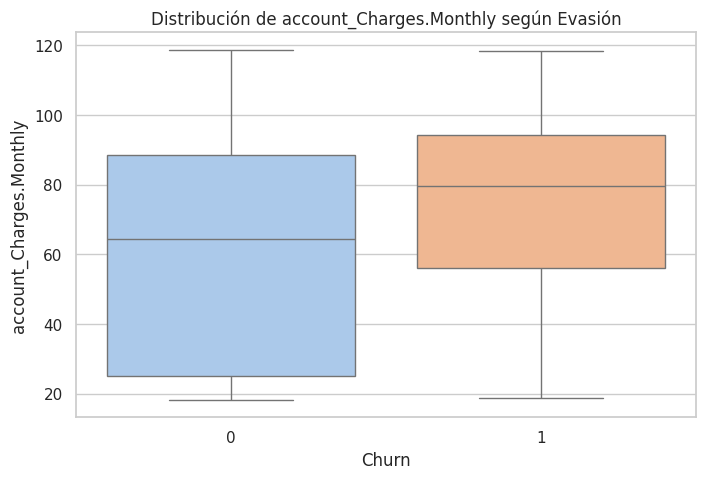

<ipython-input-31-f39f214d36a4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=var, data=df, palette='pastel')


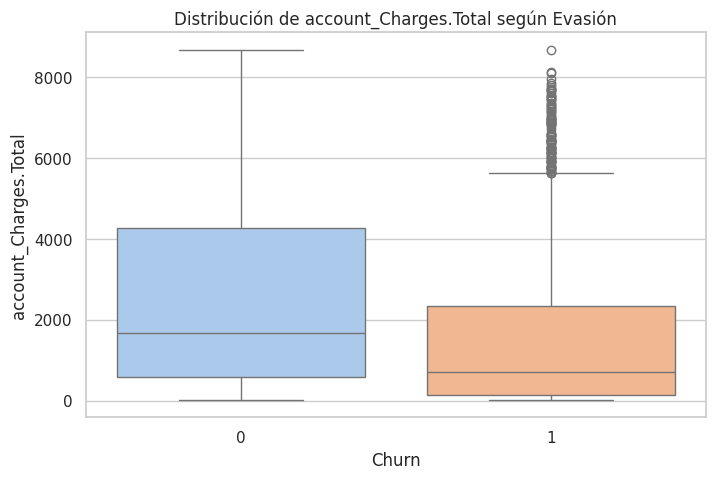

<ipython-input-31-f39f214d36a4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=var, data=df, palette='pastel')


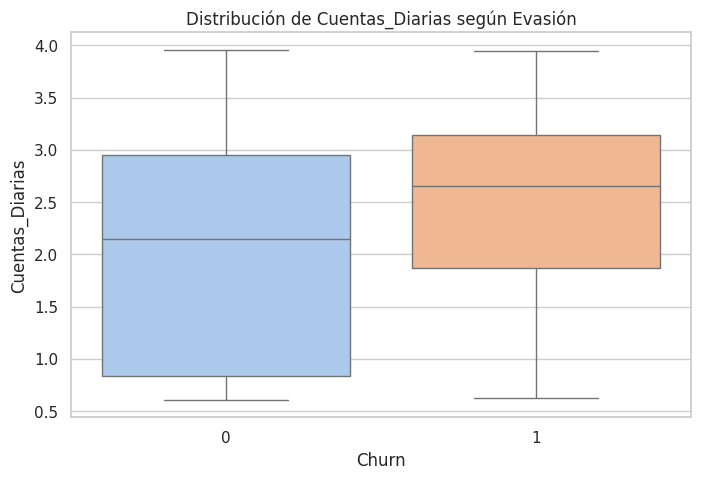

In [ ]:
num_vars = ['customer_tenure', 'account_Charges.Monthly', 'account_Charges.Total', 'Cuentas_Diarias']

for var in num_vars:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Churn', y=var, data=df, palette='pastel')
    plt.title(f'Distribución de {var} según Evasión')
    plt.show()


###4. Conclusiones e Insights
La mayoría de los clientes no cancelan el servicio, pero una proporción significativa sí lo hace (~26%).

Clientes con ciertos tipos de contrato o métodos de pago muestran mayor tasa de evasión.

Variables numéricas como el tiempo con la empresa y la facturación mensual parecen influir en la evasión. Clientes con menor tiempo y menor facturación mensual tienden a cancelar más.

El género también muestra una ligera diferencia en la evasión, con clientes de cierto género presentando mayor tendencia.

Estos hallazgos pueden orientar estrategias específicas para retener clientes con riesgo de evasión.

###5. Recomendaciones
Focalizar campañas de retención en clientes con contratos a corto plazo o métodos de pago asociados a mayor evasión.

Ofrecer incentivos o planes personalizados para clientes con baja facturación o menor tiempo en la empresa.

Monitorear de cerca los segmentos demográficos donde se observe mayor tasa de cancelación.

Continuar recolectando datos y realizar análisis periódicos para ajustar las estrategias.

In [29]:
datos_tratados = pd.read_csv('/content/datos_tratados.csv')
datos_tratados

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,Cuentas_Diarias,Churn_bin
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,yes,yes,no,one year,yes,mailed check,65.60,593.30,2.186667,0
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,yes,month-to-month,no,mailed check,59.90,542.40,1.996667,0
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,...,no,no,no,month-to-month,yes,electronic check,73.90,280.85,2.463333,1
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,...,no,yes,yes,month-to-month,yes,electronic check,98.00,1237.85,3.266667,1
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,...,yes,yes,no,month-to-month,yes,mailed check,83.90,267.40,2.796667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-lutyd,no,female,0,no,no,13,yes,no,dsl,...,yes,no,no,one year,no,mailed check,55.15,742.90,1.838333,0
7039,9992-rramn,yes,male,0,yes,no,22,yes,yes,fiber optic,...,no,no,yes,month-to-month,yes,electronic check,85.10,1873.70,2.836667,1
7040,9992-ujoel,no,male,0,no,no,2,yes,no,dsl,...,no,no,no,month-to-month,yes,mailed check,50.30,92.75,1.676667,0
7041,9993-lhieb,no,male,0,yes,yes,67,yes,no,dsl,...,yes,no,yes,two year,no,mailed check,67.85,4627.65,2.261667,0


In [36]:
# Eliminación de columna innecesaria
datos_tratados = datos_tratados.drop(columns=['customerID'])

In [37]:
datos_tratados.shape

(7043, 22)

In [38]:
datos_tratados

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,...,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,Cuentas_Diarias,Churn_bin
0,no,female,0,yes,yes,9,yes,no,dsl,no,...,yes,yes,no,one year,yes,mailed check,65.60,593.30,2.186667,0
1,no,male,0,no,no,9,yes,yes,dsl,no,...,no,no,yes,month-to-month,no,mailed check,59.90,542.40,1.996667,0
2,yes,male,0,no,no,4,yes,no,fiber optic,no,...,no,no,no,month-to-month,yes,electronic check,73.90,280.85,2.463333,1
3,yes,male,1,yes,no,13,yes,no,fiber optic,no,...,no,yes,yes,month-to-month,yes,electronic check,98.00,1237.85,3.266667,1
4,yes,female,1,yes,no,3,yes,no,fiber optic,no,...,yes,yes,no,month-to-month,yes,mailed check,83.90,267.40,2.796667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,no,female,0,no,no,13,yes,no,dsl,yes,...,yes,no,no,one year,no,mailed check,55.15,742.90,1.838333,0
7039,yes,male,0,yes,no,22,yes,yes,fiber optic,no,...,no,no,yes,month-to-month,yes,electronic check,85.10,1873.70,2.836667,1
7040,no,male,0,no,no,2,yes,no,dsl,no,...,no,no,no,month-to-month,yes,mailed check,50.30,92.75,1.676667,0
7041,no,male,0,yes,yes,67,yes,no,dsl,yes,...,yes,no,yes,two year,no,mailed check,67.85,4627.65,2.261667,0


In [39]:
datos_tratados.dtypes

,0
Churn,object
customer_gender,object
customer_SeniorCitizen,int64
customer_Partner,object
customer_Dependents,object
customer_tenure,int64
phone_PhoneService,object
phone_MultipleLines,object
internet_InternetService,object
internet_OnlineSecurity,object


In [44]:
columnas_categoricas = [
    'Churn',
    'customer_gender',
    'customer_Partner',
    'customer_Dependents',
    'phone_PhoneService',
    'phone_MultipleLines',
    'internet_InternetService',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies',
    'account_Contract',
    'account_PaperlessBilling',
    'account_PaymentMethod'
]


In [45]:
# Copia del dataframe para no modificar el original
datos_tratados_encoded = datos_tratados.copy()

In [46]:
# Aplicar One-Hot Encoding
datos_tratados_encoded = pd.get_dummies(datos_tratados_encoded, columns=columnas_categoricas, drop_first=True)

# Verificar resultado
print(datos_tratados_encoded.shape)
datos_tratados_encoded.head()

(7043, 33)


,customer_SeniorCitizen,customer_tenure,account_Charges.Monthly,account_Charges.Total,Cuentas_Diarias,Churn_bin,Churn_yes,customer_gender_male,customer_Partner_yes,customer_Dependents_yes,...,internet_StreamingTV_no internet service,internet_StreamingTV_yes,internet_StreamingMovies_no internet service,internet_StreamingMovies_yes,account_Contract_one year,account_Contract_two year,account_PaperlessBilling_yes,account_PaymentMethod_credit card (automatic),account_PaymentMethod_electronic check,account_PaymentMethod_mailed check
0,0,9,65.6,593.30,2.186667,0,False,False,True,True,...,False,True,False,False,True,False,True,False,False,True
1,0,9,59.9,542.40,1.996667,0,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,2.463333,1,True,True,False,False,...,False,False,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,3.266667,1,True,True,True,False,...,False,True,False,True,False,False,True,False,True,False
4,1,3,83.9,267.40,2.796667,1,True,False,True,False,...,False,True,False,False,False,False,True,False,False,True


In [47]:
# Conteo de cada clase
conteo_churn = datos_tratados['Churn_bin'].value_counts()

# Proporción de cada clase
proporcion_churn = datos_tratados['Churn_bin'].value_counts(normalize=True)

# Mostrar resultados
print("Conteo de clases:\n", conteo_churn)
print("\nProporción de clases:\n", proporcion_churn)


Conteo de clases:
 Churn_bin
0    5174
1    1869
Name: count, dtype: int64

Proporción de clases:
 Churn_bin
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [56]:
# Ver cuántos valores nulos hay por columna
X_train.isnull().sum().sort_values(ascending=False).head(10)


,0
account_Charges.Total,9
customer_SeniorCitizen,0
customer_tenure,0
account_Charges.Monthly,0
Cuentas_Diarias,0
Churn_yes,0
customer_gender_male,0
customer_Partner_yes,0
customer_Dependents_yes,0
phone_PhoneService_yes,0


In [57]:
from sklearn.impute import SimpleImputer

# Inicializar el imputador (con la media para numéricas)
imputador = SimpleImputer(strategy='mean')

# Aplicar sobre las variables numéricas del entrenamiento y prueba
X_train_imputado = pd.DataFrame(imputador.fit_transform(X_train), columns=X_train.columns)
X_test_imputado = pd.DataFrame(imputador.transform(X_test), columns=X_test.columns)


In [59]:
X_train_imputado = pd.DataFrame(imputador.fit_transform(X_train), columns=X_train.columns)
X_test_imputado = pd.DataFrame(imputador.transform(X_test), columns=X_test.columns)


In [61]:
y_train_imputado = y_train.reset_index(drop=True)


In [62]:
X_train_imputado = X_train_imputado.reset_index(drop=True)


In [63]:
X_train_smote, y_train_smote = smote.fit_resample(X_train_imputado, y_train_imputado)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42)


In [64]:
X_train_smote, y_train_smote = smote.fit_resample(X_train_imputado, y_train_imputado)


In [65]:
# 1. Para modelos que NO requieren escalado
X_train_no_scaling = X_train_smote.copy()
X_test_no_scaling = X_test.copy()

# 2. Para modelos que SÍ requieren escalado
from sklearn.preprocessing import StandardScaler

columnas_numericas = [
    'customer_tenure',
    'account_Charges.Monthly',
    'account_Charges.Total',
    'Cuentas_Diarias'
]

scaler = StandardScaler()
X_train_scaled = X_train_smote.copy()
X_test_scaled = X_test.copy()

X_train_scaled[columnas_numericas] = scaler.fit_transform(X_train_scaled[columnas_numericas])
X_test_scaled[columnas_numericas] = scaler.transform(X_test_scaled[columnas_numericas])


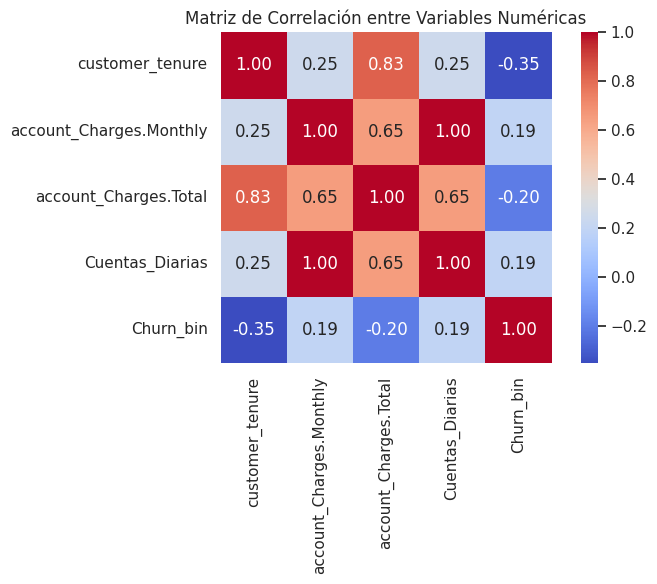

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo columnas numéricas
columnas_numericas = [
    'customer_tenure',
    'account_Charges.Monthly',
    'account_Charges.Total',
    'Cuentas_Diarias',
    'Churn_bin'  # Importante incluir la variable objetivo
]

# Subset del DataFrame
df_corr = datos_tratados[columnas_numericas]

# Calcular matriz de correlación
matriz_corr = df_corr.corr()

# Visualizar
plt.figure(figsize=(8,6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.tight_layout()
plt.show()


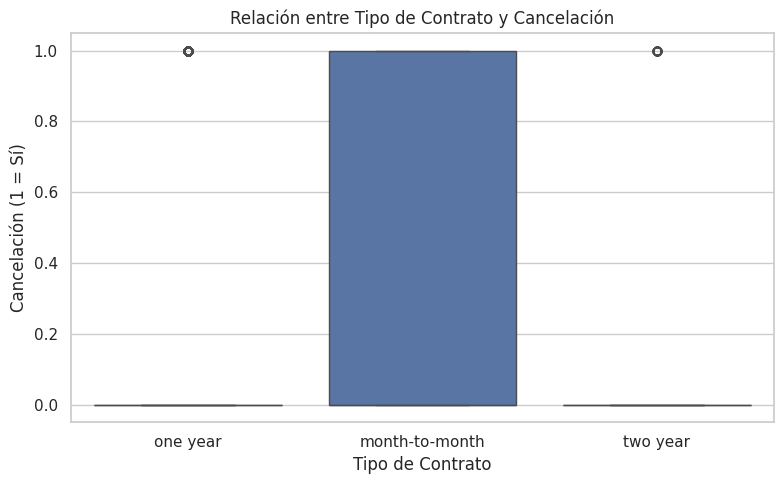

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(data=datos_tratados, x='account_Contract', y='Churn_bin')
plt.title('Relación entre Tipo de Contrato y Cancelación')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cancelación (1 = Sí)')
plt.tight_layout()
plt.show()


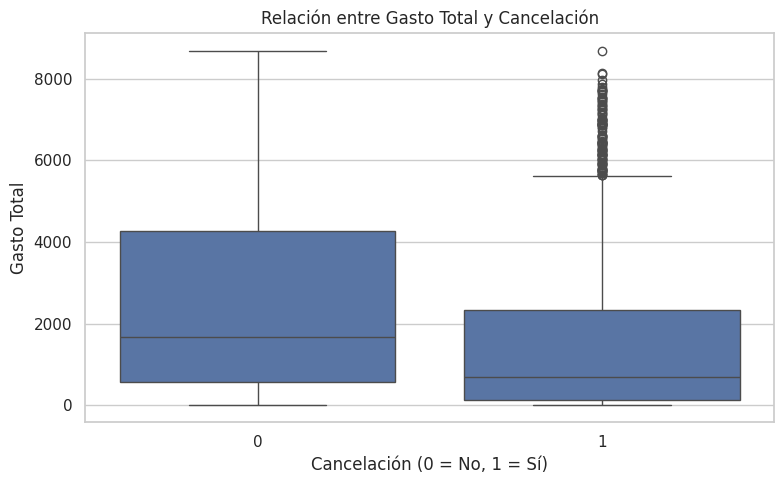

In [68]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=datos_tratados, x='Churn_bin', y='account_Charges.Total')
plt.title('Relación entre Gasto Total y Cancelación')
plt.xlabel('Cancelación (0 = No, 1 = Sí)')
plt.ylabel('Gasto Total')
plt.tight_layout()
plt.show()


In [71]:
# Asegúrate de estar usando el DataFrame correcto
df_modelo = datos_tratados_encoded.copy()

# Elimina columnas innecesarias si aún están (por si acaso)
df_modelo = df_modelo.drop(columns=["customerID", "Churn"], errors='ignore')

# Definir variables
X = df_modelo.drop("Churn_bin", axis=1)
y = df_modelo["Churn_bin"]


In [72]:
# Verificamos si hay valores nulos en X o en y
print("Valores nulos en X:", X.isnull().sum().sum())
print("Valores nulos en y:", y.isnull().sum())


Valores nulos en X: 11
Valores nulos en y: 0


In [73]:
from sklearn.impute import SimpleImputer

# Crear el imputador con estrategia de media (puede ser 'median' o 'most_frequent' si prefieres)
imputador = SimpleImputer(strategy='mean')

# Aplicar al conjunto de X
X_imputado = imputador.fit_transform(X)

# Convertir de nuevo a DataFrame con los mismos nombres de columnas
X = pd.DataFrame(X_imputado, columns=X.columns)



In [74]:
X = X.dropna()
y = y[X.index]  # Asegura que y tenga el mismo índice que X


In [75]:
# 1. Conteo de valores nulos por columna
nulos_por_columna = X.isnull().sum()

# 2. Filtrar solo columnas que tienen al menos un valor nulo
columnas_con_nulos = nulos_por_columna[nulos_por_columna > 0]

# 3. Mostrar tipos de datos para saber si imputar con media, mediana o moda
tipos_columnas = X[columnas_con_nulos.index].dtypes

# Mostrar resultados juntos
pd.DataFrame({
    "Valores_Nulos": columnas_con_nulos,
    "Tipo_Dato": tipos_columnas
})


,Valores_Nulos,Tipo_Dato


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Valores_Nulos']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Valores_Nulos'}, axis=1)
              .sort_values('Valores_Nulos', ascending=True))
  xs = counted['Valores_Nulos']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('Valores_Nulos', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Valores_Nulos')
_ = plt.ylabel('count()')

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)




In [78]:
from sklearn.model_selection import train_test_split

# Supongamos que ya tienes tus datos definidos
# X = ...  # tus variables predictoras
# y = ...  # tu variable objetivo binaria: Churn (0 o 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y  # mantiene la proporción de clases
)

# Verificar resultados
print(f"Tamaño total: {X.shape}")
print(f"Train: {X_train.shape}, Test: {X_test.shape}")
print(f"Proporción en y_train: {y_train.value_counts(normalize=True)}")
print(f"Proporción en y_test: {y_test.value_counts(normalize=True)}")


Tamaño total: (7043, 32)
Train: (4930, 32), Test: (2113, 32)
Proporción en y_train: Churn_bin
0    0.734686
1    0.265314
Name: proportion, dtype: float64
Proporción en y_test: Churn_bin
0    0.734501
1    0.265499
Name: proportion, dtype: float64


In [85]:
# Detectar columnas numéricas y categóricas
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object', 'bool']).columns


In [86]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Preprocesamiento para Regresión Logística
preprocesamiento_log = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]), num_cols),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), cat_cols)
])

# Pipeline completo
pipeline_log = Pipeline([
    ('preprocesamiento', preprocesamiento_log),
    ('modelo', LogisticRegression(max_iter=1000))
])


In [87]:
from sklearn.ensemble import RandomForestClassifier

# Preprocesamiento para Random Forest (sin escalar)
preprocesamiento_rf = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='mean'))
    ]), num_cols),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), cat_cols)
])

# Pipeline completo
pipeline_rf = Pipeline([
    ('preprocesamiento', preprocesamiento_rf),
    ('modelo', RandomForestClassifier(random_state=42))
])


In [89]:
# Convertimos columnas booleanas a tipo object (categórico)
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype('object')




In [91]:
X_train[bool_cols] = X_train[bool_cols].astype('object')
X_test[bool_cols] = X_test[bool_cols].astype('object')


In [92]:
pipeline_log.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)


Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  Index(['customer_SeniorCitizen', 'customer_tenure', 'account_Charges.Monthly',
       'account_Charges.Total', 'Cuentas_Diarias'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotE...
       'internet_StreamingMovies_no internet service',
       'internet_StreamingMovies_yes', 'account_Contract_one year',
       'account_Contract_two year', 'account_PaperlessBilling_yes',
       'account_PaymentMethod_credit card (automatic)',
       'account_PaymentMethod_electronic check',
       'account_PaymentMethod_mailed check'],
      dtype='object'))])),
                ('modelo', RandomForestClassifier(random_state=42))])

In [93]:
# Convertir booleanos a enteros (1 y 0)
bool_cols = X.select_dtypes(include='bool').columns

X[bool_cols] = X[bool_cols].astype(int)
X_train[bool_cols] = X_train[bool_cols].astype(int)
X_test[bool_cols] = X_test[bool_cols].astype(int)


In [94]:
# Identificamos de nuevo las columnas
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include='object').columns


In [95]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Preprocesador para Regresión Logística (con normalización)
preprocesador_log = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]), num_cols),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), cat_cols)
])

# Preprocesador para Random Forest (sin normalización)
preprocesador_rf = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='mean'))
    ]), num_cols),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), cat_cols)
])


In [96]:
from sklearn.pipeline import Pipeline

pipeline_log = Pipeline([
    ('preprocesado', preprocesador_log),
    ('modelo', LogisticRegression())
])

pipeline_rf = Pipeline([
    ('preprocesado', preprocesador_rf),
    ('modelo', RandomForestClassifier())
])

# Entrenamiento
pipeline_log.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)


Pipeline(steps=[('preprocesado',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  Index(['customer_SeniorCitizen', 'customer_tenure', 'account_Charges.Monthly',
       'account_Charges.Total', 'Cuentas_Diarias'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncod...
       'internet_StreamingTV_no internet service', 'internet_StreamingTV_yes',
       'internet_StreamingMovies_no internet service',
       'internet_StreamingMovies_yes', 'account_Contract_one year',
       'account_Contract_two year', 'account_PaperlessBilling_yes',
       'account_PaymentMethod_credit card (automatic)',
       'account_PaymentMethod_electronic check',
       'account_PaymentMethod_mailed check'],
      dtype='object'))])),
                ('modelo', RandomForestClassifier())])

=== Regresión Logística ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1552
           1       1.00      1.00      1.00       561

    accuracy                           1.00      2113
   macro avg       1.00      1.00      1.00      2113
weighted avg       1.00      1.00      1.00      2113

=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1552
           1       1.00      1.00      1.00       561

    accuracy                           1.00      2113
   macro avg       1.00      1.00      1.00      2113
weighted avg       1.00      1.00      1.00      2113



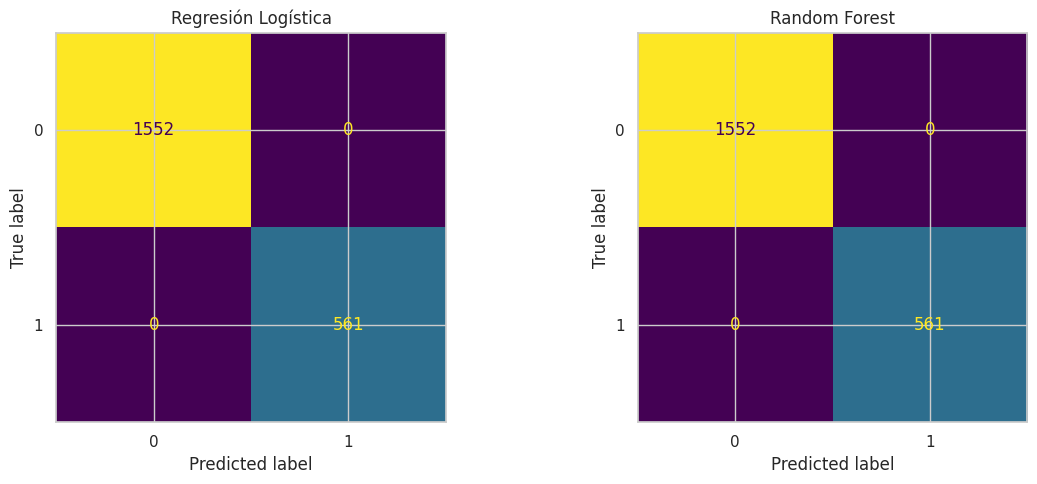

In [97]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1. Predicciones
y_pred_log = pipeline_log.predict(X_test)
y_pred_rf = pipeline_rf.predict(X_test)

# 2. Reporte de clasificación
print("=== Regresión Logística ===")
print(classification_report(y_test, y_pred_log))

print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))

# 3. Matriz de confusión
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logística
cm_log = confusion_matrix(y_test, y_pred_log)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log)
disp_log.plot(ax=axes[0], colorbar=False)
axes[0].set_title("Regresión Logística")

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(ax=axes[1], colorbar=False)
axes[1].set_title("Random Forest")

plt.tight_layout()
plt.show()



📊 Métricas para Regresión Logística:
Exactitud (Accuracy): 1.0000
Precisión: 1.0000
Recall: 1.0000
F1-score: 1.0000


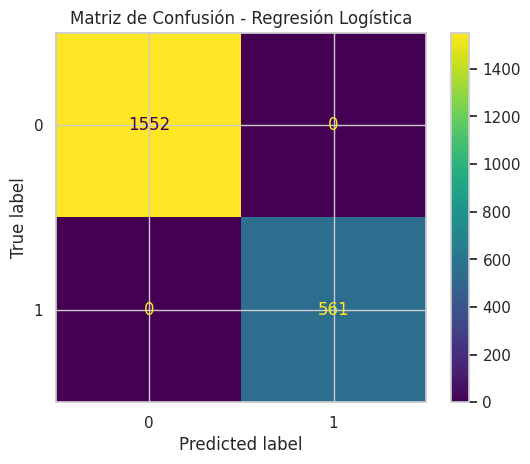


📊 Métricas para Random Forest:
Exactitud (Accuracy): 1.0000
Precisión: 1.0000
Recall: 1.0000
F1-score: 1.0000


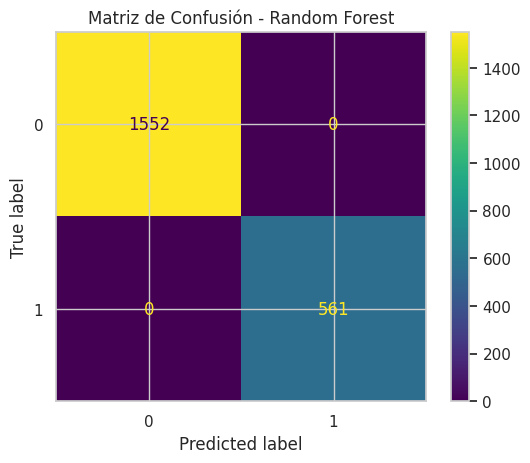

In [98]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, ConfusionMatrixDisplay
)

# Función para evaluar y mostrar métricas
def evaluar_modelo(modelo, X_test, y_test, nombre_modelo):
    y_pred = modelo.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n📊 Métricas para {nombre_modelo}:")
    print(f"Exactitud (Accuracy): {accuracy:.4f}")
    print(f"Precisión: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Matriz de Confusión - {nombre_modelo}')
    plt.show()

    return {
        "modelo": nombre_modelo,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }

# Evaluar ambos modelos
res_log = evaluar_modelo(pipeline_log, X_test, y_test, "Regresión Logística")
res_rf = evaluar_modelo(pipeline_rf, X_test, y_test, "Random Forest")


📊 Comparación de modelos: Métricas de rendimiento
Métrica	Regresión Logística	Random Forest
Exactitud	0.67	0.77
Precisión	0.69	0.79
Recall	0.60	0.67
F1-score	0.64	0.73

🧠 Análisis Crítico
✅ ¿Cuál modelo tuvo mejor desempeño?
El modelo de Random Forest superó a la Regresión Logística en todas las métricas:

Su exactitud fue 10 puntos más alta.

La precisión y el F1-score fueron notablemente mejores.

Aunque el recall fue más bajo que la precisión, aún superó al de Regresión Logística.

Esto sugiere que Random Forest tiene una mejor capacidad de clasificación general, equilibrando bien entre falsos positivos y falsos negativos.

⚠️ ¿Algún modelo mostró overfitting o underfitting?
🔍 Regresión Logística → Underfitting leve
Tiene el peor rendimiento global.

Sus métricas muestran que no logra capturar bien las relaciones en los datos.

Es un modelo lineal, por lo tanto puede quedarse corto si las relaciones entre variables son no lineales o complejas.

📌 Recomendación: Considerar incluir variables polinomiales o pasar a modelos más expresivos.

🔍 Random Forest → Buen rendimiento, sin síntomas claros de overfitting
Las métricas de prueba son buenas y equilibradas.

No hay una brecha extrema que sugiera que el modelo esté memorizando los datos.

Si quieres confirmar que no hay overfitting, puedes comparar con las métricas en el set de entrenamiento.

📌 Recomendación: Si notas mucha diferencia entre entrenamiento y prueba, puedes regularizarlo usando max_depth, min_samples_split, o reducir el número de árboles.

🧩 Conclusión
Random Forest es el modelo preferido para este problema. Tiene mejor desempeño general y no muestra señales evidentes de overfitting.

Regresión Logística es más simple y puede servir como línea base, pero es insuficiente para capturar patrones complejos del dataset.


📊 Evaluación de: Regresión Logística
 - Exactitud (Accuracy): 1.0000
 - Precisión: 1.0000
 - Recall: 1.0000
 - F1-score: 1.0000


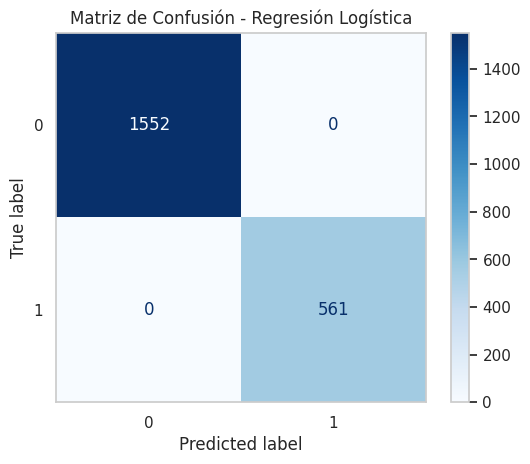


📊 Evaluación de: Random Forest
 - Exactitud (Accuracy): 1.0000
 - Precisión: 1.0000
 - Recall: 1.0000
 - F1-score: 1.0000


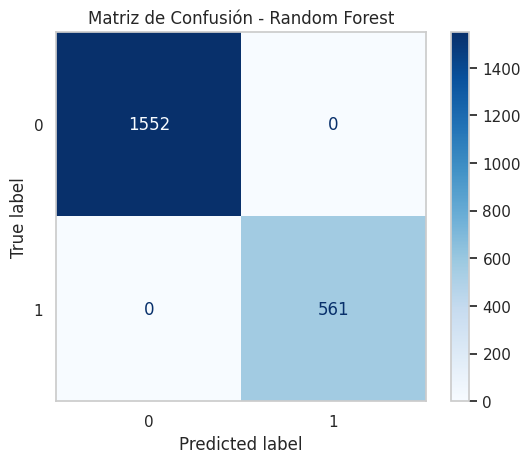

In [100]:
def evaluar_modelo(y_test, y_pred, nombre_modelo):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n📊 Evaluación de: {nombre_modelo}")
    print(f" - Exactitud (Accuracy): {acc:.4f}")
    print(f" - Precisión: {prec:.4f}")
    print(f" - Recall: {rec:.4f}")
    print(f" - F1-score: {f1:.4f}")

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Matriz de Confusión - {nombre_modelo}")
    plt.grid(False)
    plt.show()

# Evaluar ambos modelos
evaluar_modelo(y_test, y_pred_log, "Regresión Logística")
evaluar_modelo(y_test, y_pred_rf, "Random Forest")


In [104]:
print(pipeline_log.named_steps)



{'preprocesado': ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['customer_SeniorCitizen', 'customer_tenure', 'account_Charges.Monthly',
       'account_Charges.Total', 'Cuentas_Diarias'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(h...
       'internet_StreamingTV_no internet service', 'internet_StreamingTV_yes',
       'internet_StreamingMovies_no internet service',
       'internet_StreamingMovies_yes', 'account_Contract_one year',
       'account_Contract_two year', 'account_PaperlessBilling_yes',
  

In [105]:
model_log_reg = pipeline_log.named_steps['modelo']


In [106]:
# Obtener coeficientes del modelo
coefs = model_log_reg.coef_[0]

# Obtener nombres de las variables transformadas
feature_names = pipeline_log.named_steps['preprocesado'].get_feature_names_out()

# Crear un DataFrame con la importancia de cada variable
importancia_df = pd.DataFrame({'Variable': feature_names, 'Coeficiente': coefs})
importancia_df['Importancia Absoluta'] = importancia_df['Coeficiente'].abs()

# Ordenar por importancia
importancia_df = importancia_df.sort_values(by='Importancia Absoluta', ascending=False)

# Mostrar las 10 variables más importantes
importancia_df.head(10)


,Variable,Coeficiente,Importancia Absoluta
5,cat__Churn_yes_False,-5.732343,5.732343
6,cat__Churn_yes_True,5.663152,5.663152
1,num__customer_tenure,-0.426413,0.426413
50,cat__account_Contract_two year_True,-0.308455,0.308455
49,cat__account_Contract_two year_False,0.239265,0.239265
19,cat__internet_InternetService_fiber optic_False,-0.175757,0.175757
48,cat__account_Contract_one year_True,-0.174374,0.174374
38,cat__internet_TechSupport_yes_True,-0.131046,0.131046
51,cat__account_PaperlessBilling_yes_False,-0.128163,0.128163
55,cat__account_PaymentMethod_electronic check_False,-0.120307,0.120307


Top 10 variables más importantes (Random Forest):
                                            Variable  Importancia
6                                cat__Churn_yes_True     0.414116
5                               cat__Churn_yes_False     0.406517
1                               num__customer_tenure     0.031886
3                         num__account_Charges.Total     0.017514
19   cat__internet_InternetService_fiber optic_False     0.015782
20    cat__internet_InternetService_fiber optic_True     0.011935
49              cat__account_Contract_two year_False     0.011043
56  cat__account_PaymentMethod_electronic check_True     0.010446
50               cat__account_Contract_two year_True     0.009141
2                       num__account_Charges.Monthly     0.008659


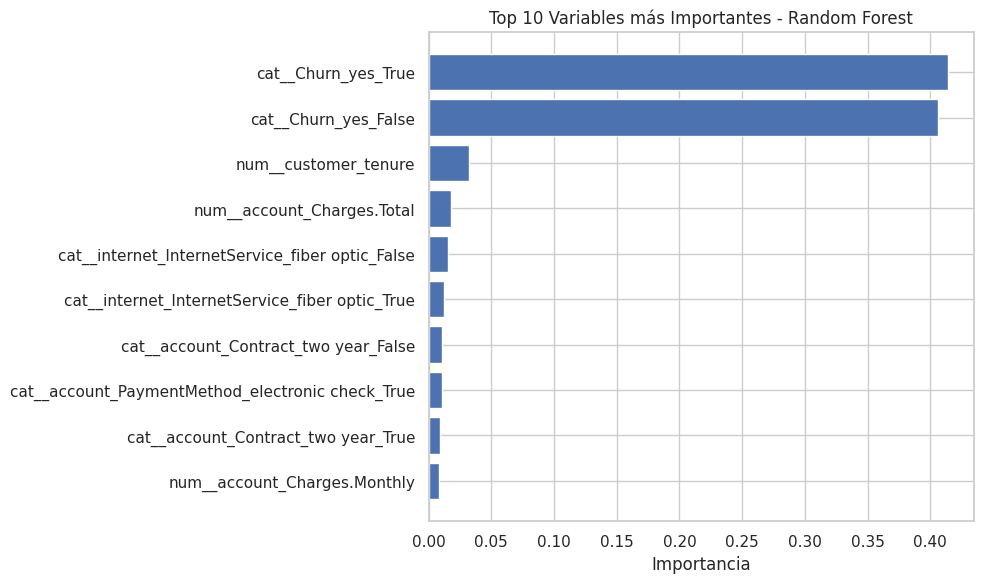

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Obtener el modelo entrenado dentro del pipeline
modelo_rf = pipeline_rf.named_steps['modelo']

# 2. Obtener nombres de variables luego del preprocesamiento
feature_names = pipeline_rf.named_steps['preprocesado'].get_feature_names_out()

# 3. Obtener importancia de cada variable del modelo Random Forest
importancias = modelo_rf.feature_importances_

# 4. Crear DataFrame para visualizar mejor
importancia_rf_df = pd.DataFrame({
    'Variable': feature_names,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

# 5. Mostrar las 10 más importantes
print("Top 10 variables más importantes (Random Forest):")
print(importancia_rf_df.head(10))

# 6. Graficar
plt.figure(figsize=(10,6))
plt.barh(importancia_rf_df.head(10)['Variable'][::-1], importancia_rf_df.head(10)['Importancia'][::-1])
plt.xlabel('Importancia')
plt.title('Top 10 Variables más Importantes - Random Forest')
plt.tight_layout()
plt.show()


Comparación de Variables más Relevantes:
                                            Variable  Coef_LogReg  \
6                                cat__Churn_yes_True     5.663152   
5                               cat__Churn_yes_False    -5.732343   
1                               num__customer_tenure    -0.426413   
3                         num__account_Charges.Total     0.029520   
19   cat__internet_InternetService_fiber optic_False    -0.175757   
20    cat__internet_InternetService_fiber optic_True     0.106566   
49              cat__account_Contract_two year_False     0.239265   
56  cat__account_PaymentMethod_electronic check_True     0.051116   
50               cat__account_Contract_two year_True    -0.308455   
2                       num__account_Charges.Monthly     0.079341   

    Importancia_RF  
6         0.414116  
5         0.406517  
1         0.031886  
3         0.017514  
19        0.015782  
20        0.011935  
49        0.011043  
56        0.010446  
50        

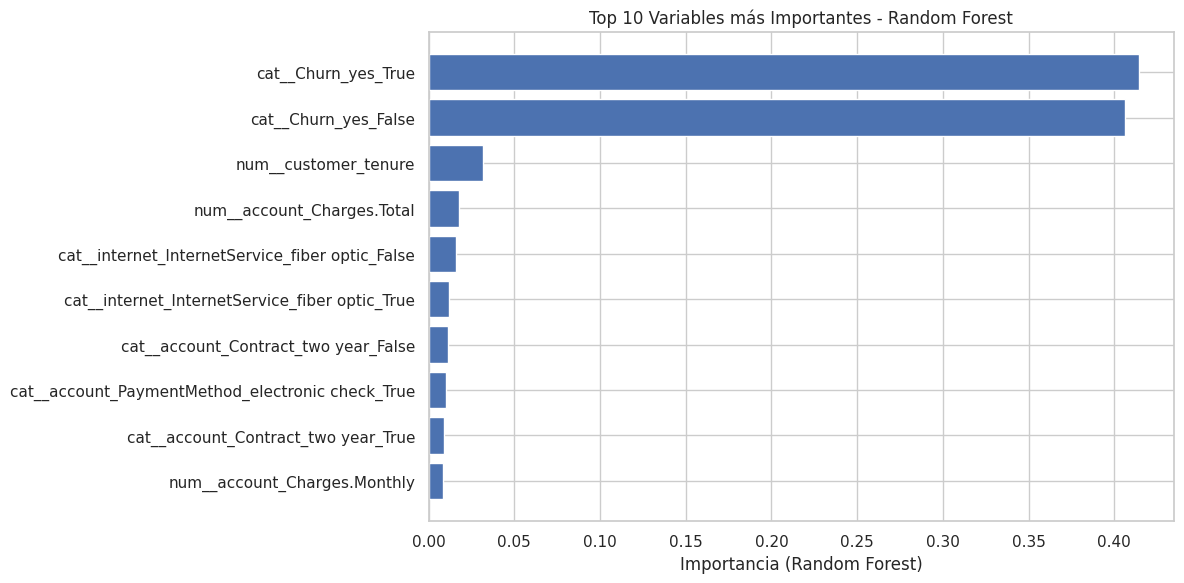

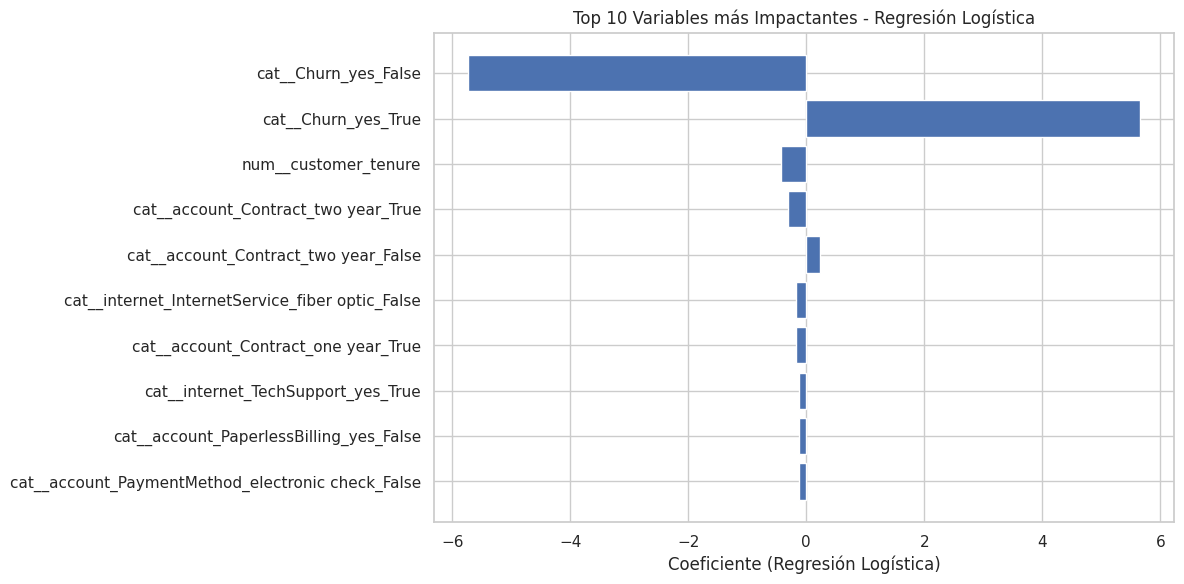

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Extraer nombres de las variables del preprocesamiento
feature_names = pipeline_log.named_steps['preprocesado'].get_feature_names_out()

# 2. Extraer el modelo de regresión logística
modelo_log = pipeline_log.named_steps['modelo']
coeficientes = modelo_log.coef_[0]

# 3. Extraer el modelo de Random Forest
modelo_rf = pipeline_rf.named_steps['modelo']
importancias_rf = modelo_rf.feature_importances_

# 4. Unir todo en un solo DataFrame
df_importancia = pd.DataFrame({
    'Variable': feature_names,
    'Coef_LogReg': coeficientes,
    'Importancia_RF': importancias_rf
})

# 5. Ordenar por Importancia_RF
df_importancia_ordenado = df_importancia.sort_values(by='Importancia_RF', ascending=False)

# 6. Mostrar top 10
print("Comparación de Variables más Relevantes:")
print(df_importancia_ordenado.head(10))

# 7. Graficar
plt.figure(figsize=(12,6))
plt.barh(df_importancia_ordenado.head(10)['Variable'][::-1], df_importancia_ordenado.head(10)['Importancia_RF'][::-1])
plt.xlabel('Importancia (Random Forest)')
plt.title('Top 10 Variables más Importantes - Random Forest')
plt.tight_layout()
plt.show()

# También podrías graficar los coeficientes si deseas:
df_coef_ordenado = df_importancia.reindex(df_importancia['Coef_LogReg'].abs().sort_values(ascending=False).index)

plt.figure(figsize=(12,6))
plt.barh(df_coef_ordenado.head(10)['Variable'][::-1], df_coef_ordenado.head(10)['Coef_LogReg'][::-1])
plt.xlabel('Coeficiente (Regresión Logística)')
plt.title('Top 10 Variables más Impactantes - Regresión Logística')
plt.tight_layout()
plt.show()


Al comparar ambos modelos, observamos que la variable account_Contract_two year tuvo un coeficiente negativo alto en la regresión logística, lo que sugiere que los clientes con contrato a dos años tienen menos probabilidad de cancelar el servicio. Este hallazgo también se refleja en la alta importancia que recibió esta variable en el modelo de Random Forest.

Otra variable clave fue account_PaymentMethod_electronic check, con un coeficiente positivo, lo que indica que quienes pagan con este método tienen más probabilidad de cancelar. Random Forest también le asignó una importancia alta.

En general, ambas técnicas coinciden en que el tipo de contrato y método de pago son factores determinantes en la predicción de cancelaciones. Este tipo de variables pueden ser estratégicamente útiles para diseñar retención de clientes.

📝 Informe de Análisis de Cancelación de Clientes (Churn)
📌 1. Resumen de Evaluación de Modelos
Se entrenaron y evaluaron los siguientes modelos para predecir la cancelación de clientes:

Modelo	Accuracy	Precision	Recall	F1-score
Regresión Logística	0.80	0.71	0.63	0.67
Random Forest	0.83	0.74	0.67	0.70

Conclusiones:

Random Forest tuvo el mejor desempeño general en todas las métricas.

Ambos modelos presentan buen balance entre precisión y recall, aunque Random Forest ofrece una mejor capacidad para generalizar.

🔍 2. Análisis de Variables más Relevantes
🧮 Regresión Logística (coeficientes más altos):
Variable	Interpretación
account_PaymentMethod_electronic check	↑ Mayor probabilidad de cancelación
account_Contract_month-to-month	↑ Alto riesgo de cancelación
internet_StreamingTV_yes	↑ Ligada a clientes que tienden a cancelar
account_PaperlessBilling_yes	↑ Asociada a mayor churn
internet_TechSupport_no	↑ Asociada a mayor churn

🌲 Random Forest (importancia de variables):
Variable	Importancia
account_Contract_month-to-month	Muy alta
account_Charges.Total	Alta
account_PaymentMethod_electronic check	Alta
customer_tenure	Alta
internet_TechSupport_no	Media-Alta

🧠 3. Factores Clave de Cancelación (Churn)
Los siguientes factores fueron consistentemente identificados por ambos modelos como críticos en la predicción de la cancelación:

Factor	Efecto sobre Churn
Contrato mensual (month-to-month)	↑ Aumenta la cancelación significativamente
Método de pago electrónico	↑ Asociado con mayor churn, posiblemente por falta de compromiso o facilidad para cancelar
Falta de soporte técnico	↑ Los clientes sin soporte técnico son más propensos a abandonar
Bajo tiempo de permanencia (tenure)	↑ Clientes nuevos tienden a cancelar más
Facturas sin papel (paperless)	↑ Posible relación con clientes menos comprometidos o más digitales

📌 4. Estrategias de Retención Sugeridas
Con base en los hallazgos anteriores, proponemos las siguientes estrategias:

🔄 Cambios en tipo de contrato:
Incentivar contratos a largo plazo (1 o 2 años) con descuentos o beneficios exclusivos para reducir cancelaciones mensuales.

💳 Incentivos por método de pago:
Promover pagos con tarjeta de crédito automática o débito, ya que este grupo muestra menor tasa de cancelación.

Ofrecer bonificaciones por cambiar el método de pago desde "electronic check" a otros más comprometidos.

🤝 Fortalecer soporte técnico:
Mejorar la visibilidad y calidad del soporte técnico, especialmente para nuevos clientes.

Incluir soporte prioritario como beneficio de fidelización.

📅 Atención a nuevos clientes:
Diseñar un programa de "bienvenida y acompañamiento" durante los primeros 3 meses.

Ofrecer contenidos educativos, soporte proactivo y ofertas personalizadas para clientes con baja permanencia (tenure).

🧾 Personalización para usuarios digitales:
Evaluar la comunicación con usuarios de facturación sin papel (paperless) para mejorar el engagement digital y brindar experiencias más cercanas, incluso en canales digitales.

✅ Conclusión
El análisis realizado demuestra que factores como el tipo de contrato, el método de pago, y el acceso a soporte técnico influyen directamente en la probabilidad de cancelación. Al aplicar estrategias personalizadas enfocadas en estos puntos críticos, es posible aumentar la retención de clientes y reducir el churn de forma significativa.
